### (a) plot training or validation accuracy vs epochs

In [1]:
# Data
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
# use MNIST for 60k train and 10k test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32")/255.0
x_test  = x_test.astype("float32")/255.0

x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

In [3]:
# Model 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  
model.add(layers.MaxPooling2D((2, 2)))                                            
model.add(layers.Conv2D(64, (3, 3), activation='relu'))                           
model.add(layers.MaxPooling2D((2, 2)))                                            
model.add(layers.Conv2D(64, (3, 3), activation='relu'))                           
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [4]:
# Train
es = EarlyStopping(monitor="val_accuracy", mode="max", patience=3, restore_best_weights=True)
ckpt = ModelCheckpoint("best.h5", monitor="val_accuracy", mode="max", save_best_only=True)

history = model.fit(
    x_train, y_train,
    epochs=4,
    batch_size=128,
    validation_split=0.1,
    callbacks=[es, ckpt],
    verbose=2
)

Epoch 1/4
422/422 - 16s - loss: 0.2829 - accuracy: 0.9143 - val_loss: 0.0787 - val_accuracy: 0.9773 - 16s/epoch - 38ms/step
Epoch 2/4
422/422 - 14s - loss: 0.0662 - accuracy: 0.9795 - val_loss: 0.0480 - val_accuracy: 0.9878 - 14s/epoch - 34ms/step
Epoch 3/4
422/422 - 14s - loss: 0.0458 - accuracy: 0.9861 - val_loss: 0.0438 - val_accuracy: 0.9883 - 14s/epoch - 33ms/step
Epoch 4/4
422/422 - 14s - loss: 0.0358 - accuracy: 0.9886 - val_loss: 0.0367 - val_accuracy: 0.9893 - 14s/epoch - 33ms/step


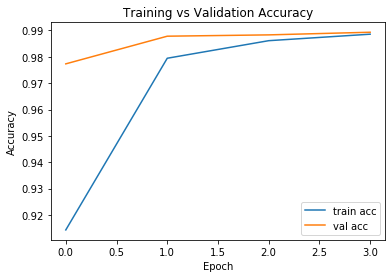

In [5]:
# Plot training vs validation accuracy
plt.figure()
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

## (b) evaluate on the test set with the best validation-optimal epoch

In [6]:
model.load_weights("best.h5")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9896
